# Proyecto Final de Data Science III - Redes neuronales y Deep Learning

Russo Tomás - Comisión 61640

 Consignas para los alumnos:
 1. Analiza la estructura de la red neuronal correcta y observa la función de cada capa.
 2. Reordena las capas del modelo para que coincidan con el modelo correcto.
 3. Una pista: empieza con Flatten y termina con la capa de 10 neuronas con softmax.
 4. Luego de corregir el modelo, compílalo y entrénalo para verificar su accuracy.
 5. Calcula el accuracy del modelo corregido.

 PS: para la compilaciòn: optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

 PS2: para el entrenamiento no màs de 5 e`pocas y validarlo.

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

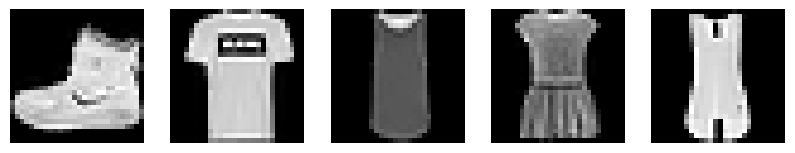

In [11]:
# Cargar el dataset Fashion-MNIST
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalizar los datos

# Mostrar algunas imágenes del dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].axis('off')
plt.show()


In [12]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # 1. Capa de entrada (Convierte 28x28 en 784)
    Dense(512, activation='relu'),  # 2. Primera capa oculta con 512 neuronas
    Dropout(0.2),  # 3. Dropout para evitar sobreajuste
    Dense(256, activation='relu'),  # 4. Segunda capa oculta con 256 neuronas
    Dropout(0.2),  # 5. Otro Dropout
    Dense(128, activation='relu'),  # 6. Tercera capa oculta con 128 neuronas
    Dense(10, activation='softmax')  # 7. Capa de salida con 10 clases
])




In [13]:
model.summary() #Resumen del modelo

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

# Estructura de la Red Neuronal

1. **Capa de entrada Flatten:** Convierte una imagen 28x28 en un vector unidimensional de 784 valores (para trabajar con capas densas).

2. **Capa oculta 1 (Dense 515):** 512 neuronas con activación ReLU. Aprende representaciones de alto nivel.

3. **Capa oculta 2 (Dense 256):** Reduce la cantidad de neuronas a 256, sigue aplicando ReLU.

4. **Dropout Dropout (0.2):** Apagado aleatorio del 20% de las neuronas para evitar sobreajuste.

5. **Capa oculta 3 (Dense128):** Reduce aún más la dimensionalidad con 128 neuronas.

6. **Capa de salida (Dense 10)/Softmax:** 10 neuronas para clasificación (Fashion MNIST tiene 10 categorías). Softmax convierte los valores en probabilidades para cada clase.

**Esta es una red feedforward con capas densas, usando ReLU para activación y Softmax para clasificación. **

# Compilación y entrenamiento del modelo

In [14]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.7578 - loss: 0.6719 - val_accuracy: 0.8413 - val_loss: 0.4380
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8480 - loss: 0.4143 - val_accuracy: 0.8337 - val_loss: 0.4597
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8629 - loss: 0.3750 - val_accuracy: 0.8568 - val_loss: 0.3996
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.8693 - loss: 0.3532 - val_accuracy: 0.8656 - val_loss: 0.3634
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8774 - loss: 0.3397 - val_accuracy: 0.8720 - val_loss: 0.3583


# Evaluación del modelo con los datos de prueba

In [16]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8729 - loss: 0.3523


# Precisión del modelo

In [17]:
print(f"Precisión en los datos de prueba: {test_accuracy:.4f}")

Precisión en los datos de prueba: 0.8720


# Prueba del modelo

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


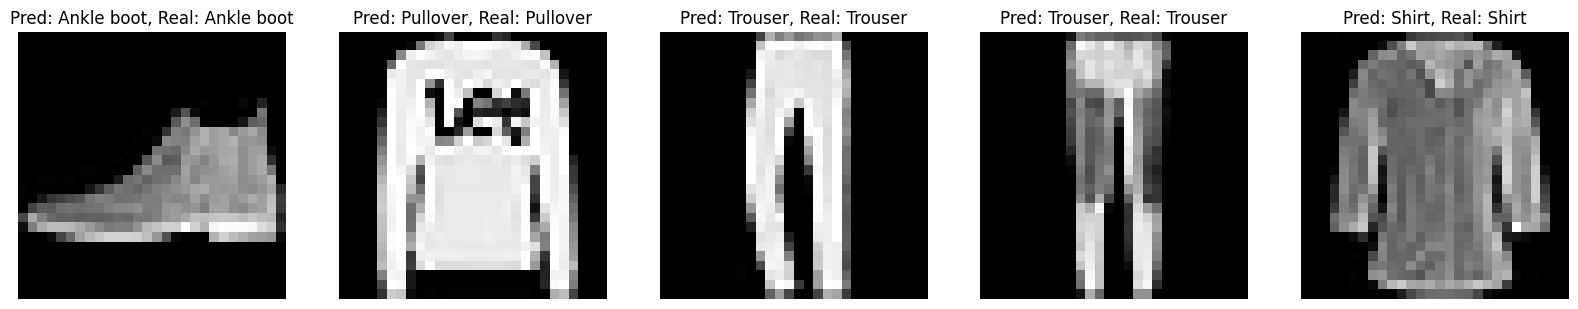

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Realizar predicciones en las imágenes de prueba
predictions = model.predict(x_test)

num_images = 5
plt.figure(figsize=(20, 20))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = np.argmax(predictions[i])
    true_label = y_test[i]
    plt.title(f"Pred: {class_names[predicted_label]}, Real: {class_names[true_label]}")
    plt.axis('off')

plt.show()